**Zad 1**

In [1]:
import numpy
A=numpy.matrix([[1,1],[1,1.0001]])
print(A)
print('Wynik równania mimo bardzo małej zmiany w macierzy b różni się znacząco.(1,1) dla b1 oraz (2,0) dla b2\n')
print(numpy.linalg.cond(A,1))

[[1.     1.    ]
 [1.     1.0001]]
Wynik równania mimo bardzo małej zmiany w macierzy b różni się znacząco.(1,1) dla b1 oraz (2,0) dla b2

40004.0001000044


**Zad 2**

In [2]:
import scipy.linalg as sla
import numpy.linalg as nla
import scipy.sparse.linalg as ssla
import time
import math
import numpy
import scipy
macierz=sla.hilbert(8) #tworzenie macierzy Hilberta 8x8
wskaznik1=nla.cond(macierz,1) #norma kolumnowa
wskaznik2=nla.cond(macierz,2) #norma spektralna
wskaznik3=nla.cond(macierz,numpy.inf)#norma wierszowa
print(wskaznik1)
print(wskaznik2)
print(wskaznik3)
print('Współczynniki uwarunkowania są bardzo wysokie czyli macierz Hilberta 8x8 jest źle uwarunkowana')

33872789110.107353
15257575566.627958
33872789109.75766
Współczynniki uwarunkowania są bardzo wysokie czyli macierz Hilberta 8x8 jest źle uwarunkowana


**Zad 3**

In [3]:
t = numpy.linspace(0,1,20)
b = [math.cos(4*k) for k in t]
A = numpy.vander(t,20,True)

#1.rozwiazanie metoda solve
start1=time.time()
x1=nla.solve(A,b)
stop1=time.time()
print(numpy.allclose(numpy.dot(A, x1), b)) #sprawdzenie rezultatu
r1=b-numpy.matmul(A,x1)

#2.rozwiazanie z uzyciem rozkladu QR
Q,R = numpy.linalg.qr(A)
start2=time.time()
x2=sla.solve_triangular(R, numpy.matmul(numpy.transpose(Q),b))
stop2=time.time()
print(numpy.allclose(numpy.dot(A, x2), b)) #sprawdzenie rezultatu
r2=b-numpy.matmul(A,x2)

#3.rozwiazanie metoda lstsq
start3=time.time()
lst=nla.lstsq(A,b)
x3=lst[0]
stop3=time.time()
print(numpy.allclose(numpy.dot(A, x3), b)) #sprawdzenie rezultatu
r3=b-numpy.matmul(A,x3)

#print(A)
print("Czas wykonania: ")
print("Czas solve: ",(stop1-start1)*1000,"ms")
print("Czas QR: ",(stop2-start2)*1000,"ms")
print("Czas lstsq: ",(stop3-start3)*1000,"ms")


print("Porównanie norm: ")
print("Norma solve: ",nla.norm(r1))
print("Norma QR: ",nla.norm(r2))
print("Norma lstsq: ",nla.norm(r3))

print("Najszybszą oraz najdokładniejszą metodą jest metoda solve. Najgorzej spisała się metoda lstsq, może wynikać to z tego że nie jest przeznaczona do macierzy kwadratowych. Metoda z podzialem QR dała zadowalające wyniki, lecz gorsze od solve.")

True
True
True
Czas wykonania: 
Czas solve:  2.0971298217773438 ms
Czas QR:  1.3928413391113281 ms
Czas lstsq:  3.9548873901367188 ms
Porównanie norm: 
Norma solve:  4.539224769718596e-15
Norma QR:  4.927865468515168e-15
Norma lstsq:  7.075562588188589e-15
Najszybszą oraz najdokładniejszą metodą jest metoda solve. Najgorzej spisała się metoda lstsq, może wynikać to z tego że nie jest przeznaczona do macierzy kwadratowych. Metoda z podzialem QR dała zadowalające wyniki, lecz gorsze od solve.


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


**Zad 4**

[1.062360046744907]
[1.062360046744907, 1.8224498619787342]
[1.062360046744907, 1.8224498619787342, 9.473132288821757]
[1.062360046744907, 1.8224498619787342, 9.473132288821757, 566.004378669534]
[1.062360046744907, 1.8224498619787342, 9.473132288821757, 566.004378669534, 1594.4709254292952]
[1.062360046744907, 1.8224498619787342, 9.473132288821757, 566.004378669534, 1594.4709254292952, 2101.538707859212]


No handles with labels found to put in legend.


[0.005515730381011963, 0.008703131675720215, 0.007865159511566163, 0.006596138477325439, 0.007621450424194336, 0.005492682456970215]
[0.0011421489715576173, 0.0021614480018615724, 0.007563800811767578, 0.2268926191329956, 0.856853392124176, 0.8479638195037842]
[0.0006105899810791016, 0.0009365081787109375, 0.005173444747924805, 3.947155475616455, 35.55188000202179, 33.48551535606384]


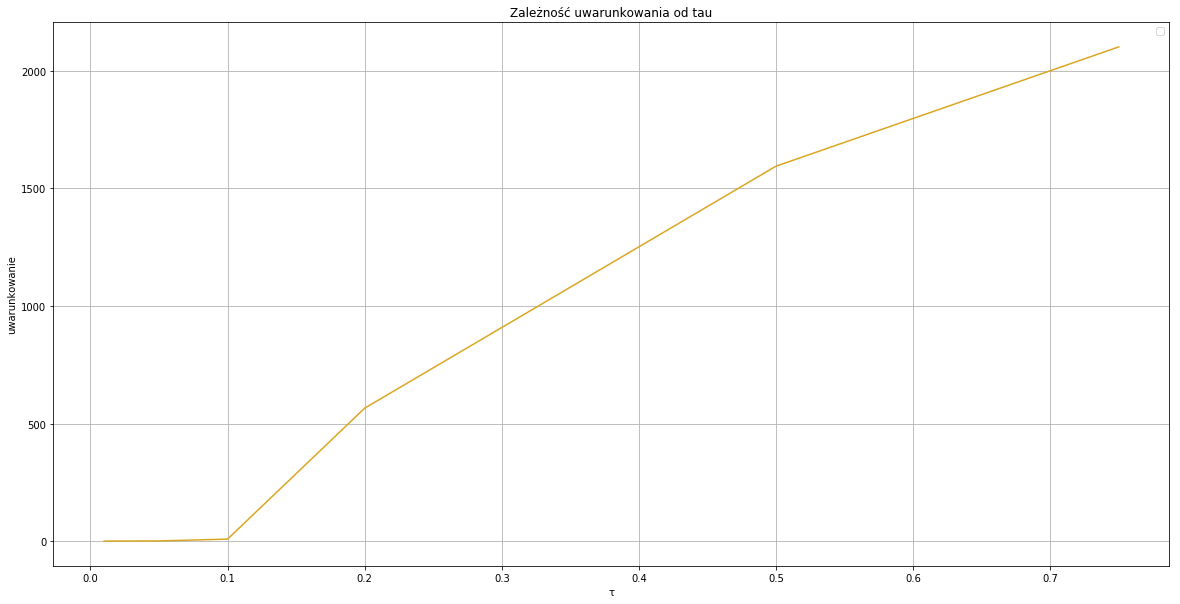

No handles with labels found to put in legend.


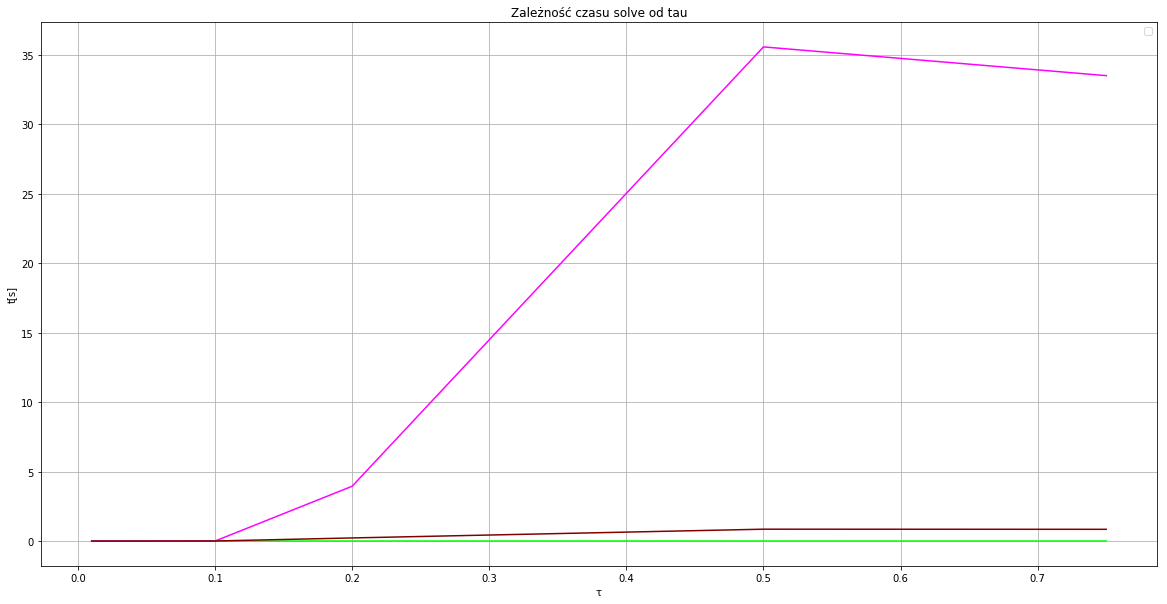

Wraz ze wzrostem tau, wzrasta współczynnik uwarunkowania. W macierzy pojawia się coraz więcej zera i staję się ona przez to coraz gorzej uwarunkowana.
Czas wykonania też wzrasta wraz ze wzrostem tau. W metodzie gmr ożemy zaobserwować tu wzrost logarytmiczny.
Najlepsze wyniki ze wszystkich metod zdecydowanie daje metoda solve. Zdecydoowanie najgorzej spisuje się metoda gmr. Czas jej wykonania jest dużo większy niż w przypadku pozostałych metod, znacznie gorzej radzi sobie ona ze slabo uwarunkowanymi macierzami.


In [8]:
import matplotlib.pyplot as plt
jedynki=numpy.ones((500,500))
samejedynki=numpy.diag(numpy.diag(jedynki))
losowe=numpy.random.uniform(-1,1,500*500)
losowe=losowe.reshape((500,500))
losowe=numpy.triu(losowe)+numpy.triu(losowe,-1).T
for k in range (0,500):
    losowe[k,k] = 0

bezt=losowe+samejedynki
#print(bezt[35,22])
#print(bezt[22,35]) jest symetryczna

b=numpy.random.uniform(-1,1,500)
t = [0.01, 0.05, 0.1, 0.2, 0.5, 0.75]
uwarunkowania=[]
solveT=[]
bicgT=[]
gmrT=[]

for i in t:
    A= bezt.copy()
    for k in range (0,500):
        for j in range (0,500):
            if(abs(A[k][j])>i and k!=j):
                A[k][j]=0
    
    uwarunkowania.append(numpy.linalg.cond(A))
    print(uwarunkowania)
    start = time.time()
    for k in range (0,100):
        solve=nla.solve(A,b)
    stop=time.time()
    solveT.append((stop-start)/100)
    #print(solve)
   
    
    rzadka=scipy.sparse.csr_matrix(A)
    
    start = time.time()
    for k in range (0,100):
        bicg=ssla.bicg(rzadka,b)
    stop=time.time()
    bicgT.append((stop-start)/100)
   
    
    start = time.time()
    for k in range (0,2):
        gmr=ssla.gmres(rzadka,b)
    stop=time.time()
    gmrT.append((stop-start)/2)
   
    
    
print(solveT)
print(bicgT)
print(gmrT)
plt.figure(figsize=(20,10))
plt.plot(t,uwarunkowania,color="goldenrod")
plt.title('Zależność uwarunkowania od tau')
plt.xlabel('τ')
plt.ylabel('uwarunkowanie')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(20,10))
plt.plot(t,solveT,color="lime")
plt.plot(t,gmrT,color="magenta")
plt.plot(t,bicgT,color="maroon")
plt.title('Zależność czasu solve od tau')
plt.xlabel('τ')
plt.ylabel('t[s]')
plt.legend()
plt.grid()
plt.show()


print('Wraz ze wzrostem tau, wzrasta współczynnik uwarunkowania. W macierzy pojawia się coraz więcej zera i staję się ona przez to coraz gorzej uwarunkowana.')
print('Czas wykonania też wzrasta wraz ze wzrostem tau. W metodzie gmr ożemy zaobserwować tu wzrost logarytmiczny.')
print('Najlepsze wyniki ze wszystkich metod zdecydowanie daje metoda solve. Zdecydoowanie najgorzej spisuje się metoda gmr. Czas jej wykonania jest dużo większy niż w przypadku pozostałych metod, znacznie gorzej radzi sobie ona ze slabo uwarunkowanymi macierzami.')

**Zad 5**

In [10]:
def gauss(A,b):
    L = numpy.tril(A)
    U = A - L
    x = numpy.zeros_like(b)
    it=0
    for z in range(0,1000):
        x1 = numpy.matmul(nla.inv(L), b - numpy.matmul(U, x))
        if numpy.allclose(x, x1, rtol=1e-9):
            break
        it+=1
        x=x1
    print('Liczba iteracji: ',it)
    return x1

A = numpy.array([[1, 1, -1], 
    [2, 2, -3],
    [-1, 0, 2]])
b = numpy.array([2,-1,7])
print(gauss(A,b))
print(nla.solve(A,b))

A = numpy.array([[1,2,3],
                 [2,1,3],
                 [3,2,1]])
b = numpy.array([1,2,0])

print(gauss(A,b))
print(nla.solve(A,b))

print('Dla poprawnego działania metody Gaussa Seidla, macierz na ktorej przeprowadzane są operacje muszą spełniać pewne warunki')
print('Dla potrzeb tej metody zakłada się że współczynniki równania znajdowały się na głównej przekątnej macierzy A, dodatkowo stosuję się ją tylko gdy w macierzy występuję silna dominacja w rzędach oraz kolumnach.')
print('Macierz podana w zadaniu nie jest odpowiednia dla tej metody gdyż nie są spełnione podane wcześniej warunki oraz nie jest dodatnio określona.')
print('Dla macierzy która spełnia warunki, algorytm działa dobrze.')

Liczba iteracji:  135
[3.00000006 3.99999998 5.00000003]
[3. 4. 5.]
Liczba iteracji:  1000
[nan nan nan]
[ 0.25 -0.75  0.75]
Dla poprawnego działania metody Gaussa Seidla, macierz na ktorej przeprowadzane są operacje muszą spełniać pewne warunki
Dla potrzeb tej metody zakłada się że współczynniki równania znajdowały się na głównej przekątnej macierzy A, dodatkowo stosuję się ją tylko gdy w macierzy występuję silna dominacja w rzędach oraz kolumnach.
Macierz podana w zadaniu nie jest odpowiednia dla tej metody gdyż nie są spełnione podane wcześniej warunki oraz nie jest dodatnio określona.
Dla macierzy która spełnia warunki, algorytm działa dobrze.
